In [29]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
img = cv2.imread('test_images/srk_01.jpg')
img.shape
img

array([[[26, 19, 24],
        [25, 18, 23],
        [24, 17, 22],
        ...,
        [21, 14, 19],
        [21, 14, 19],
        [21, 14, 19]],

       [[26, 19, 24],
        [26, 19, 24],
        [24, 17, 22],
        ...,
        [21, 14, 19],
        [21, 14, 19],
        [21, 14, 19]],

       [[26, 19, 24],
        [26, 19, 24],
        [25, 18, 23],
        ...,
        [21, 14, 19],
        [21, 14, 19],
        [21, 14, 19]],

       ...,

       [[58, 38, 51],
        [63, 43, 56],
        [56, 36, 49],
        ...,
        [51, 31, 43],
        [50, 30, 42],
        [49, 29, 41]],

       [[66, 46, 59],
        [66, 46, 59],
        [67, 47, 60],
        ...,
        [46, 26, 38],
        [48, 28, 40],
        [49, 29, 41]],

       [[60, 40, 53],
        [61, 41, 54],
        [64, 44, 57],
        ...,
        [52, 32, 44],
        [54, 34, 46],
        [56, 36, 48]]], dtype=uint8)

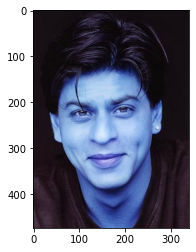

In [31]:
plt.imshow(img)

In [32]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(474, 339)

In [33]:
gray

array([[21, 20, 19, ..., 16, 16, 16],
       [21, 21, 19, ..., 16, 16, 16],
       [21, 21, 20, ..., 16, 16, 16],
       ...,
       [44, 49, 42, ..., 37, 36, 35],
       [52, 52, 53, ..., 32, 34, 35],
       [46, 47, 50, ..., 38, 40, 42]], dtype=uint8)

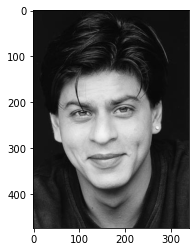

In [34]:
plt.imshow(gray, cmap='gray')

In [35]:
face_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 31, 127, 249, 249]], dtype=int32)

In [36]:
(x,y,w,h) = faces[0]
x,y,w,h

(31, 127, 249, 249)

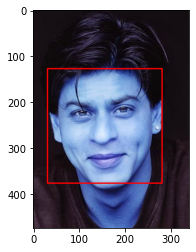

In [37]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

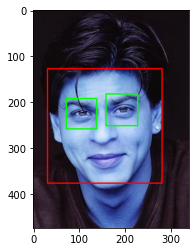

In [38]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,520,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

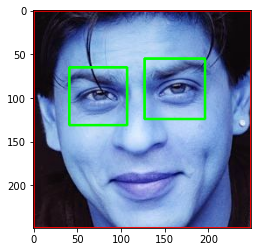

In [39]:

%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [40]:
cropped_img = np.array(roi_color)
cropped_img.shape

(249, 249, 3)

In [41]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color


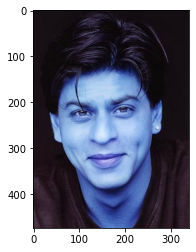

In [42]:
original_image = cv2.imread('test_images/srk_01.jpg')
plt.imshow(original_image)

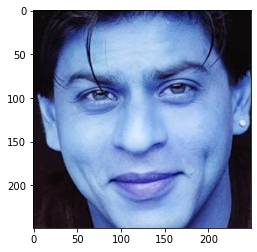

In [24]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/srk_01.jpg')
plt.imshow(cropped_image)

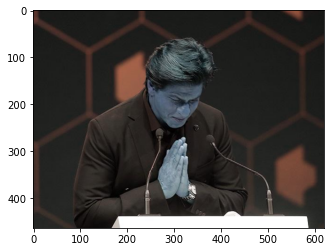

In [43]:
org_image_obstructed = cv2.imread('./test_images/srk_02.jpg')
plt.imshow(org_image_obstructed)

In [44]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/akshay_01.jpg')
cropped_image_no_2_eyes

In [45]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [46]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [47]:
img_dirs

['./dataset/akshay_kumar',
 './dataset/alia_bhatt',
 './dataset/deepika_padukone',
 './dataset/ranveer_singh',
 './dataset/shahrukh_khan']

In [48]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [49]:

cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        #print(entry.path)
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

akshay_kumar
Generating cropped images in folder:  ./dataset/cropped/akshay_kumar
alia_bhatt
Generating cropped images in folder:  ./dataset/cropped/alia_bhatt
deepika_padukone
Generating cropped images in folder:  ./dataset/cropped/deepika_padukone
ranveer_singh
Generating cropped images in folder:  ./dataset/cropped/ranveer_singh
shahrukh_khan
Generating cropped images in folder:  ./dataset/cropped/shahrukh_khan


# delete unwanted cropped images manually 

# Wavelet Transform

In [50]:
#wavelet transform using python wavelet transform library
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

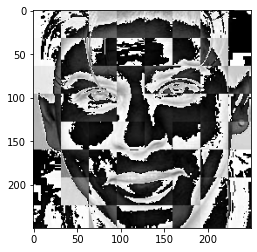

In [51]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [52]:
celebrity_file_names_dict

{'akshay_kumar': ['./dataset/cropped/akshay_kumar/akshay_kumar1.png',
  './dataset/cropped/akshay_kumar/akshay_kumar2.png',
  './dataset/cropped/akshay_kumar/akshay_kumar3.png',
  './dataset/cropped/akshay_kumar/akshay_kumar4.png',
  './dataset/cropped/akshay_kumar/akshay_kumar5.png',
  './dataset/cropped/akshay_kumar/akshay_kumar6.png',
  './dataset/cropped/akshay_kumar/akshay_kumar7.png',
  './dataset/cropped/akshay_kumar/akshay_kumar8.png',
  './dataset/cropped/akshay_kumar/akshay_kumar9.png',
  './dataset/cropped/akshay_kumar/akshay_kumar10.png',
  './dataset/cropped/akshay_kumar/akshay_kumar11.png',
  './dataset/cropped/akshay_kumar/akshay_kumar12.png',
  './dataset/cropped/akshay_kumar/akshay_kumar13.png',
  './dataset/cropped/akshay_kumar/akshay_kumar14.png',
  './dataset/cropped/akshay_kumar/akshay_kumar15.png',
  './dataset/cropped/akshay_kumar/akshay_kumar16.png',
  './dataset/cropped/akshay_kumar/akshay_kumar17.png',
  './dataset/cropped/akshay_kumar/akshay_kumar18.png',
  '

In [54]:
#create a dictionary for returning number for celebrity name
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'akshay_kumar': 0,
 'alia_bhatt': 1,
 'deepika_padukone': 2,
 'ranveer_singh': 3,
 'shahrukh_khan': 4}

In [56]:
#Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed 
#images to train our classifier.Let's prepare X and y now

X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [58]:
len(X[0])

4096

In [59]:
X[0]

array([[253],
       [146],
       [102],
       ...,
       [ 64],
       [  0],
       [  0]], dtype=uint8)

In [60]:
y[0]

0

In [61]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(197, 4096)

# Training Model

 use SVM with rbf kernel tuned with heuristic finetuning

In [63]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.64

In [65]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.67      0.55      0.60        11
           2       0.36      0.71      0.48         7
           3       0.89      0.73      0.80        11
           4       0.69      0.75      0.72        12

    accuracy                           0.64        50
   macro avg       0.68      0.64      0.63        50
weighted avg       0.70      0.64      0.65        50



# Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [66]:

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [67]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [68]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.782759,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.502529,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.795632,{'logisticregression__C': 5}


In [69]:

best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [70]:
best_estimators['svm'].score(X_test,y_test)

0.82

In [71]:
best_estimators['random_forest'].score(X_test,y_test)

0.5

In [72]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.74

In [73]:
best_clf = best_estimators['svm']

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  0,  0,  2],
       [ 0,  8,  3,  0,  0],
       [ 0,  2,  5,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  1,  1, 10]], dtype=int64)

Text(69.0, 0.5, 'Truth')

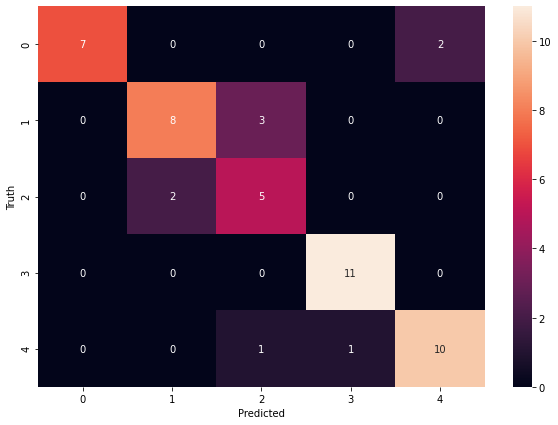

In [75]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [76]:
class_dict

{'akshay_kumar': 0,
 'alia_bhatt': 1,
 'deepika_padukone': 2,
 'ranveer_singh': 3,
 'shahrukh_khan': 4}

# save trained model

In [77]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

# save class dictionary

In [78]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))